Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [18]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
df.set_index('timestamp', inplace=True)

In [21]:
df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
lastday = df['2017-08-29']

In [0]:
lastday_filtered= lastday[lastday['category']== 'IMDb users']

In [24]:
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [25]:
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [26]:
pct_columns = ['1_pct', '2_pct', '3_pct',	'4_pct',	'5_pct', '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [27]:
plot_data = final[pct_columns].T
plot_data.index=range(1,11)
plot_data.columns= ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


In [0]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

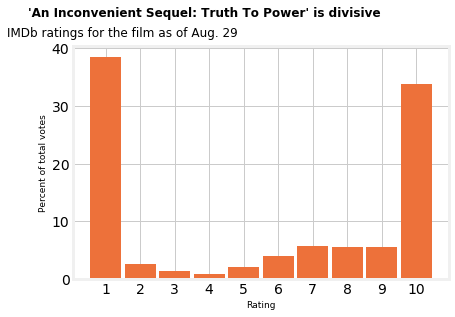

In [29]:
fig, ax = plt.subplots()

fig.patch.set(facecolor= 'white')

ax.bar(x=range(1,11), height=plot_data['percent'] , width=0.9, color='#ED713A')

ax.set(facecolor='white')

ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s='IMDb ratings for the film as of Aug. 29', fontsize=12, x=-1.85, y=42)

ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel('Percent of total votes', fontsize=9)

ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(ran












ge(0,50,10))
ax.set_yticks(range(0,50,10));

In [0]:
# I didnt copy paste,  but I didnt understand everything I typed out either. Now to try to figure it out for myself ;)

In [30]:
# So I finally found one I like
#'https://fivethirtyeight.com/features/how-baby-boomers-get-high/'

from IPython.display import display, Image
example= Image(url='https://fivethirtyeight.com/wp-content/uploads/2015/04/barry-jester-datalab-boomersdruguse-actual.png?w=575', width=575)
display(example)

In [31]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving drug-use-by-age.csv to drug-use-by-age.csv


In [42]:
df= pd.read_csv('drug-use-by-age.csv')
df

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,7.0,4.0,1.8,4.0,9.2,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,8.6,3.0,1.4,3.0,9.4,12.0,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,7.4,2.0,1.5,4.0,10.0,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0,6.3,4.0,1.4,2.0,9.0,15.0,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [70]:
fake= df[['age','marijuana-use','cocaine-use','crack-use','heroin-use','hallucinogen-use','inhalant-use','pain-releiver-use',
   'oxycontin-use','tranquilizer-use','stimulant-use','meth-use','sedative-use']]
fake

,age,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2
5,17,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5
6,18,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4
7,19,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3
8,20,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5
9,21,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3


In [80]:
df_boomer= fake[fake['age']=='50-64']
df_boomer

,age,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
15,50-64,7.3,0.9,0.4,0.1,0.3,0.2,2.5,0.4,1.4,0.3,0.2,0.2


In [0]:
df_boomer.set_index('age', inplace=True)

In [82]:
df_boomer

,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
age,,,,,,,,,,,,
50-64,7.3,0.9,0.4,0.1,0.3,0.2,2.5,0.4,1.4,0.3,0.2,0.2


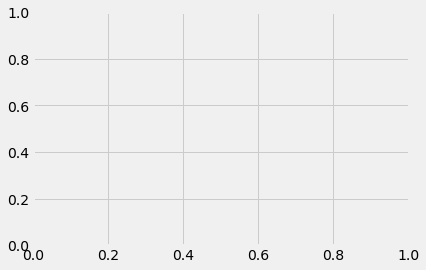

In [47]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots()

In [83]:
df_boomer.columns

Index(['marijuana-use', 'cocaine-use', 'crack-use', 'heroin-use',
       'hallucinogen-use', 'inhalant-use', 'pain-releiver-use',
       'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use',
       'sedative-use'],
      dtype='object')

In [84]:
df_boomer.columns= [column.replace('-use', '') for column in df_boomer]
df_boomer

,marijuana,cocaine,crack,heroin,hallucinogen,inhalant,pain-releiver,oxycontin,tranquilizer,stimulant,meth,sedative
age,,,,,,,,,,,,
50-64,7.3,0.9,0.4,0.1,0.3,0.2,2.5,0.4,1.4,0.3,0.2,0.2


In [85]:
df_boomer['pain reliever']= df_boomer['pain-releiver']
df_boomer

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,marijuana,cocaine,crack,heroin,hallucinogen,inhalant,pain-releiver,oxycontin,tranquilizer,stimulant,meth,sedative,pain reliever
age,,,,,,,,,,,,,
50-64,7.3,0.9,0.4,0.1,0.3,0.2,2.5,0.4,1.4,0.3,0.2,0.2,2.5


In [86]:
df_boomer =df_boomer.drop('pain-releiver', axis=1)
df_boomer

,marijuana,cocaine,crack,heroin,hallucinogen,inhalant,oxycontin,tranquilizer,stimulant,meth,sedative,pain reliever
age,,,,,,,,,,,,
50-64,7.3,0.9,0.4,0.1,0.3,0.2,0.4,1.4,0.3,0.2,0.2,2.5


In [87]:
df_boomer

,marijuana,cocaine,crack,heroin,hallucinogen,inhalant,oxycontin,tranquilizer,stimulant,meth,sedative,pain reliever
age,,,,,,,,,,,,
50-64,7.3,0.9,0.4,0.1,0.3,0.2,0.4,1.4,0.3,0.2,0.2,2.5


In [90]:
fake_data= df_boomer[['marijuana','pain reliever', 'tranquilizer', 'cocaine', 'crack', 'oxycontin', 'stimulant', 'hallucinogen','sedative', 'inhalant', 'meth', 'heroin']]
fake_data

,marijuana,pain reliever,tranquilizer,cocaine,crack,oxycontin,stimulant,hallucinogen,sedative,inhalant,meth,heroin
age,,,,,,,,,,,,
50-64,7.3,2.5,1.4,0.9,0.4,0.4,0.3,0.3,0.2,0.2,0.2,0.1


In [111]:
fake_data1= pd.DataFrame()
fake_data1[['Marijuana','Pain Reliever', 'Tranquilizer', 'Cocaine', 'Crack', 'Oxycontin', 'Stimulant', 'Hallucinogen','Sedative', 'Inhalant', 'Meth', 'Heroin']]= fake_data[['marijuana','pain reliever', 'tranquilizer', 'cocaine', 'crack', 'oxycontin', 'stimulant', 'hallucinogen','sedative', 'inhalant', 'meth', 'heroin']]
fake_data1

,Marijuana,Pain Reliever,Tranquilizer,Cocaine,Crack,Oxycontin,Stimulant,Hallucinogen,Sedative,Inhalant,Meth,Heroin
age,,,,,,,,,,,,
50-64,7.3,2.5,1.4,0.9,0.4,0.4,0.3,0.3,0.2,0.2,0.2,0.1


In [112]:
fake_data1.T

age,50-64
Marijuana,7.3
Pain Reliever,2.5
Tranquilizer,1.4
Cocaine,0.9
Crack,0.4
Oxycontin,0.4
Stimulant,0.3
Hallucinogen,0.3
Sedative,0.2
Inhalant,0.2


In [0]:
plot_data= fake_data1.T

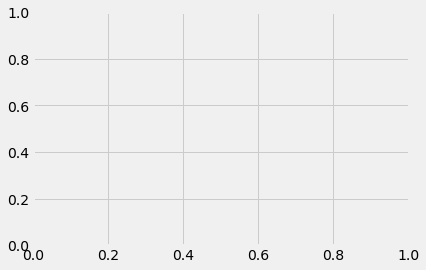

In [138]:
fig, ax= plt.subplots()

In [128]:
plot_data.index

Index(['Marijuana', 'Pain Reliever', 'Tranquilizer', 'Cocaine', 'Crack',
       'Oxycontin', 'Stimulant', 'Hallucinogen', 'Sedative', 'Inhalant',
       'Meth', 'Heroin'],
      dtype='object')

In [129]:
plot_data

age,50-64
Marijuana,7.3
Pain Reliever,2.5
Tranquilizer,1.4
Cocaine,0.9
Crack,0.4
Oxycontin,0.4
Stimulant,0.3
Hallucinogen,0.3
Sedative,0.2
Inhalant,0.2


In [104]:
display(example)

In [125]:
drug_list= []

for drug in plot_data.index:
  drug_list.append(drug)

drug_list

['Marijuana',
 'Pain Reliever',
 'Tranquilizer',
 'Cocaine',
 'Crack',
 'Oxycontin',
 'Stimulant',
 'Hallucinogen',
 'Sedative',
 'Inhalant',
 'Meth',
 'Heroin']

[Text(0, 0, 'Marijuana'),
 Text(0, 0, 'Pain Reliever'),
 Text(0, 0, 'Tranquilizer'),
 Text(0, 0, 'Cocaine'),
 Text(0, 0, 'Crack'),
 Text(0, 0, 'Oxycontin'),
 Text(0, 0, 'Stimulant'),
 Text(0, 0, 'Hallucinogen'),
 Text(0, 0, 'Sedative'),
 Text(0, 0, 'Inhalant'),
 Text(0, 0, 'Meth'),
 Text(0, 0, 'Heroin')]

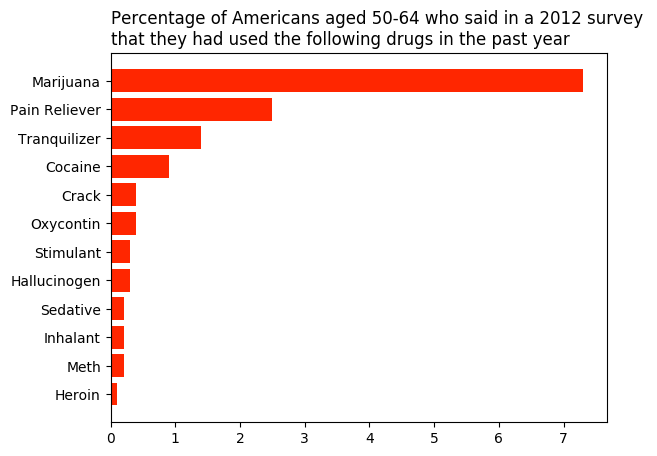

In [155]:
fig, ax= plt.subplots()
fig.patch.set(facecolor='white')

ax.barh(np.arange(0,12), plot_data['50-64'], align='center', color= '#FF2600')

ax.set(facecolor='white')

ax.set_title('Percentage of Americans aged 50-64 who said in a 2012 survey \nthat they had used the following drugs in the past year',loc='left')

ax.invert_yaxis()
ax.set_yticks(np.arange(0,12))
ax.set_yticklabels(drug_list)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here